# TAREA 3

In [85]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

* ### Carga y limpieza de datos

In [93]:
riqueza = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')
defunciones = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto37/Defunciones.csv')
vacunacion = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_1eraDosis.csv')
poblacion.rename(columns = {'COMUNA' : 'Codigo comuna'}, inplace = True)
riqueza.rename(columns = {'comuna' : 'Codigo comuna'}, inplace = True)

In [57]:
vacunacion['Region'].value_counts()

Metropolitana                                53
Valparaiso                                   39
Biobio                                       34
Del Libertador General Bernardo O’Higgins    34
La Araucania                                 33
Maule                                        31
Los Lagos                                    31
Nuble                                        22
Coquimbo                                     16
Los Rios                                     13
Magallanes y la Antartica                    12
Aysen                                        11
Atacama                                      10
Antofagasta                                  10
Tarapaca                                      8
Arica y Parinacota                            5
Name: Region, dtype: int64

In [58]:
comunasrm= vacunacion[vacunacion['Region']== 'Metropolitana']

In [59]:
col_list=list(comunasrm)
#Eliminaremos las columnas que no nos sirven para poder sumar tranquilamente.
col_list.remove('Codigo region')
col_list.remove('Codigo comuna')
col_list.remove('Poblacion')
col_list.remove('Region')
col_list.remove('Comuna')
comunasrm
#eliminamnos una fila que contenía solo valore NaN
comunasrm = comunasrm.drop([140],axis=0)
#creamos una columna llamada Total, en la cual se encuentra la suma de todas las vacunaciones por Comuna
comunasrm["Vacunados"] = comunasrm[col_list].sum(axis=1)
comunasrm.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,Vacunados
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,44.0,0.0,0.0,15.0,10.0,30.0,15.0,20.0,0.0,6232.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,464.0,188.0,0.0,301.0,250.0,668.0,436.0,251.0,0.0,74943.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,81.0,0.0,0.0,44.0,26.0,110.0,119.0,91.0,0.0,21869.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,314.0,144.0,0.0,240.0,172.0,312.0,191.0,125.0,189.0,50012.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,563.0,298.0,44.0,489.0,387.0,378.0,272.0,206.0,476.0,74707.0


In [61]:
#Eliminamos todas las columnas que poseen fecha, ya que están sumadas en el Total
comunasrm = comunasrm[['Region','Comuna','Codigo comuna','Poblacion','Vacunados']]
riqueza = riqueza[['Codigo comuna', 'HDI']]

In [62]:
comunasrm.head()

,Region,Comuna,Codigo comuna,Poblacion,Vacunados
88,Metropolitana,Alhue,13502.0,7405.0,6232.0
89,Metropolitana,Buin,13402.0,109641.0,74943.0
90,Metropolitana,Calera de Tango,13403.0,28525.0,21869.0
91,Metropolitana,Cerrillos,13102.0,88956.0,50012.0
92,Metropolitana,Cerro Navia,13103.0,142465.0,74707.0


In [63]:
riqueza.head()

,Codigo comuna,HDI
0,13101,0.861222
1,13102,0.764616
2,13103,0.718874
3,13104,0.749584
4,13105,0.742015


In [64]:
riqueza['Codigo comuna'].head()

0    13101
1    13102
2    13103
3    13104
4    13105
Name: Codigo comuna, dtype: int64

* ### Merge/fusión de los datos en un solo Dataframe

In [67]:
df = pd.merge(comunasrm,riqueza, how='inner', on='Codigo comuna')
df['Porcentaje'] = df['Vacunados']/df['Poblacion']

In [68]:
df.head()

,Region,Comuna,Codigo comuna,Poblacion,Vacunados,HDI,Porcentaje
0,Metropolitana,Alhue,13502.0,7405.0,6232.0,0.742609,0.841594
1,Metropolitana,Buin,13402.0,109641.0,74943.0,0.766439,0.683531
2,Metropolitana,Calera de Tango,13403.0,28525.0,21869.0,0.715509,0.766661
3,Metropolitana,Cerrillos,13102.0,88956.0,50012.0,0.764616,0.562211
4,Metropolitana,Cerro Navia,13103.0,142465.0,74707.0,0.718874,0.524388


# Linear Regression

In [71]:
spector_data = sm.datasets.spector.load(as_pandas=False)

spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(spector_data.endog, spector_data.exog)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Sun, 11 Jul 2021   Prob (F-statistic):            0.00157
Time:                        20:01:48   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

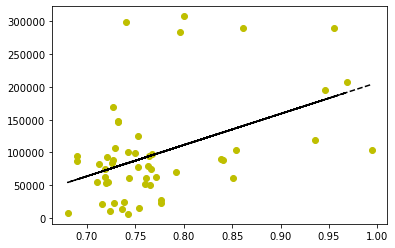

In [76]:
from pylab import *
x1 = df['HDI']
y1 = df['Vacunados']
x= np.array(x1)
y= np.array(y1)
m,b=polyfit(x,y,1)
plot(x,y,'yo', x, m*x+b, '--k')
show()

In [86]:
df.describe()

,Codigo comuna,Poblacion,Vacunados,HDI,Porcentaje
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,13238.076923,156251.384615,98359.576923,0.772583,0.668446
std,178.051309,135806.806340,78161.917042,0.074180,0.166899
min,13101.000000,7405.000000,6232.000000,0.679979,0.458029
25%,13113.750000,85574.000000,54084.250000,0.726528,0.572565
50%,13126.500000,123316.500000,83226.000000,0.751125,0.657715
75%,13401.250000,182598.500000,104879.000000,0.780087,0.713640
max,13605.000000,645909.000000,307945.000000,0.994584,1.318538


In [87]:
reg1='Vacunados~HDI'

In [88]:
reg1output=smf.ols(reg1,df).fit()

In [89]:
print(reg1output.summary())

                            OLS Regression Results                            
Dep. Variable:              Vacunados   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     12.84
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           0.000768
Time:                        20:33:08   Log-Likelihood:                -653.20
No. Observations:                  52   AIC:                             1310.
Df Residuals:                      50   BIC:                             1314.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.696e+05   1.03e+05     -2.614      0.0